In [ ]:
# Import file reading and image packages
import os
import json
from PIL import Image
from PIL import ImageOps
import requests
from io import BytesIO
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# Import array and ML packages
import numpy as np
import tensorflow as tf
from keras.utils import to_categorical
from keras.datasets import fashion_mnist
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tqdm import tqdm

#process date by resizing. 
def process_street_shop_data(category, set_type, width, height):
    print('processing', category, set_type)
    dir = '/content/drive/My Drive/CS 230 /images/' + category + '/' + set_type
    os.chdir(dir)
    user_list = []
    shop_list = []

    for image_name in tqdm(os.listdir()):
        if image_name[0] == 'i':
            resized_image = Image.open(image_name).resize((width, height))
            image_array = np.asarray(resized_image)
            user_list.append(image_array)
        if image_name[0] == 'o':
            resized_image = Image.open(image_name).resize((width, height))
            image_array = np.asarray(resized_image)
            shop_list.append(image_array)
    X = np.asarray(user_list)
    Y = np.asarray(shop_list)
    return (X, Y)

In [ ]:
#Resize the images and store the XY pairs (user image to shop image)

width = 128
height = 128
train_X = [0]
train_Y = [0]
test_X = [0]
test_Y = [0]
category_list = ['bags','belts','eyewear', 'footwear','hats','leggings','outerwear','pants','tops','dresses','skirts']


for category in category_list:
    cur_train = process_street_shop_data(category, 'train', width, height)
    cur_test = process_street_shop_data(category, 'test', width, height)
    if len(train_X) == 1:
        train_X = cur_train[0]
        train_Y = cur_train[1]
        test_X = cur_test[0]
        test_Y = cur_test[1]
    else:
        train_X = np.concatenate((train_X, cur_train[0]))
        train_Y = np.concatenate((train_Y, cur_train[1]))
        test_X = np.concatenate((test_X, cur_test[0]))
        test_Y = np.concatenate((test_Y, cur_test[1]))
    print("Category complete\n")
    print("Train size: " + str(len(train_X)) + '\n')
    print("Test size: " + str(len(test_X)) + '\n')
   




  0%|          | 0/820 [00:00<?, ?it/s]

processing pants train




  0%|          | 1/820 [00:00<06:21,  2.15it/s]

  0%|          | 2/820 [00:00<06:15,  2.18it/s]

  0%|          | 3/820 [00:01<06:06,  2.23it/s]

  0%|          | 4/820 [00:01<06:05,  2.24it/s]

  1%|          | 5/820 [00:02<06:07,  2.22it/s]

  1%|          | 6/820 [00:02<06:02,  2.25it/s]

  1%|          | 7/820 [00:03<05:42,  2.37it/s]

  1%|          | 8/820 [00:03<05:27,  2.48it/s]

  1%|          | 9/820 [00:03<05:00,  2.70it/s]

  1%|          | 10/820 [00:04<05:24,  2.50it/s]

  1%|▏         | 11/820 [00:04<05:32,  2.43it/s]

  1%|▏         | 12/820 [00:05<05:55,  2.28it/s]

  2%|▏         | 13/820 [00:05<05:43,  2.35it/s]

  2%|▏         | 14/820 [00:05<05:27,  2.46it/s]

  2%|▏         | 15/820 [00:06<05:35,  2.40it/s]

  2%|▏         | 16/820 [00:06<04:53,  2.74it/s]

  2%|▏         | 17/820 [00:07<05:33,  2.41it/s]

  2%|▏         | 18/820 [00:07<05:12,  2.57it/s]

  2%|▏         | 19/820 [00:07<05:04,  2.63it/s]

  2%|▏         | 20/820 [00:08<05:18,  2.51it/s]

  3%|▎ 

processing pants test




  8%|▊         | 10/132 [00:00<00:02, 47.95it/s]

 11%|█         | 14/132 [00:00<00:02, 43.14it/s]

 15%|█▌        | 20/132 [00:00<00:02, 46.08it/s]

 21%|██        | 28/132 [00:00<00:02, 51.31it/s]

 26%|██▌       | 34/132 [00:00<00:01, 51.94it/s]

 30%|███       | 40/132 [00:00<00:01, 51.35it/s]

 35%|███▍      | 46/132 [00:00<00:01, 51.36it/s]

 39%|███▉      | 52/132 [00:01<00:01, 52.30it/s]

 45%|████▌     | 60/132 [00:01<00:01, 56.82it/s]

 50%|█████     | 66/132 [00:01<00:01, 54.84it/s]

 55%|█████▍    | 72/132 [00:01<00:01, 54.66it/s]

 59%|█████▉    | 78/132 [00:01<00:01, 50.47it/s]

 64%|██████▎   | 84/132 [00:01<00:01, 45.91it/s]

 67%|██████▋   | 89/132 [00:01<00:01, 38.07it/s]

 71%|███████   | 94/132 [00:01<00:01, 37.58it/s]

 77%|███████▋  | 101/132 [00:02<00:00, 43.59it/s]

 83%|████████▎ | 110/132 [00:02<00:00, 49.25it/s]

 88%|████████▊ | 116/132 [00:02<00:00, 49.88it/s]

 92%|█████████▏| 122/132 [00:02<00:00, 38.43it/s]

100%|██████████| 132/132 [00:02<00:00, 48.32

Category complete

Train size: 410

Test size: 66



In [ ]:
#Save the data.
os.chdir('/content/drive/My Drive/CS 230 /street_to_shop_model_data')
train_X_reshaped = train_X.reshape(train_X.shape[0], -1)
test_X_reshaped = test_X.reshape(test_X.shape[0], -1)
print(test_X_reshaped.shape)
train_Y_reshaped = train_Y.reshape(train_Y.shape[0], -1)
test_Y_reshaped = test_Y.reshape(test_Y.shape[0], -1)
np.savetxt("train_X_pants.csv",train_X_reshaped)
np.savetxt("test_X_pants.csv",test_X_reshaped)
np.savetxt("train_Y_pants.csv",train_Y_reshaped)
np.savetxt("test_Y_pants.csv", test_Y_reshaped)

NameError: ignored

In [ ]:
#Load data from drive
os.chdir('/content/drive/My Drive/CS 230 /street_to_shop_model_data')
train_X_reshaped = np.loadtxt("train_X_reshaped.csv")
test_X_reshaped = np.loadtxt("test_X_reshaped.csv")
train_Y_reshaped = np.loadtxt("train_Y.csv")
test_Y_reshaped = np.loadtxt("test_Y.csv")

In [ ]:
#Reshape the data from csv. 
width = 128
height = 128
train_X = train_X_reshaped.reshape((train_X_reshaped.shape[0],width,height,1))
test_X = test_X_reshaped.reshape((test_X_reshaped.shape[0],width,height,1))
train_Y = train_Y_reshaped.reshape((train_Y_reshaped.shape[0],width,height,1))
test_Y = test_Y_reshaped.reshape((test_Y_reshaped.shape[0],width,height, 1))
print(test_Y.shape)
print(train_X.shape)


(627, 128, 128, 1)
(1799, 128, 128, 1)


In [ ]:
#add test X and train X for face recognition CNN
train_X = np.concatenate((train_X, train_Y))
train_X.shape

(3598, 128, 128, 1)

Trial 1: Face Recognition CNN 

In [ ]:
#Trial 1: Face recognition CNN for street to shop retrieval 
batch_size = 128
number_of_outputs = train_X.shape[0]/2
epochs = 500

street_to_shop_model = Sequential()
street_to_shop_model.add(Conv2D(36, kernel_size=(7, 7),activation='relu',padding='same',input_shape=(128,128,1)))
street_to_shop_model.add(MaxPooling2D((2, 2),padding='same'))
street_to_shop_model.add(BatchNormalization())
street_to_shop_model.add(Conv2D(54, (5, 5), activation='relu',padding='same'))
street_to_shop_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
street_to_shop_model.add(BatchNormalization())
street_to_shop_model.add(Flatten())
street_to_shop_model.add(Dense(2024, activation='relu'))
street_to_shop_model.add(BatchNormalization()) 
street_to_shop_model.add(Dropout(0.50))
street_to_shop_model.add(Dense(1024, activation='relu')) 
street_to_shop_model.add(BatchNormalization())    
street_to_shop_model.add(Dropout(0.5))
street_to_shop_model.add(Dense(512, activation='relu'))    
street_to_shop_model.add(Dropout(0.5))
street_to_shop_model.add(Dense(number_of_outputs, activation='softmax'))

street_to_shop_model.summary()
street_to_shop_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 36)      1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 36)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 36)        144       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 54)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 54)        216       
_________________________________________________________________
flatten (Flatten)            (None, 55296)             0

In [ ]:
#Reshape train Y as the categorical outputs
categories = 1799
train_Y = np.array([x for x in range(categories)])
train_Y = np.concatenate((train_Y, train_Y))
train_Y = tf.keras.utils.to_categorical(train_Y)
print(train_Y)
print(train_Y.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(3598, 1799)


In [ ]:
#Train the model to get embeddings.
history = street_to_shop_model.fit(train_X, train_Y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/500
29/29 [==============================] - 2s 63ms/step - loss: 8.3794 - accuracy: 8.3380e-04
Epoch 2/500
29/29 [==============================] - 2s 62ms/step - loss: 7.9750 - accuracy: 0.0017
Epoch 3/500
29/29 [==============================] - 2s 62ms/step - loss: 7.6509 - accuracy: 0.0017
Epoch 4/500
29/29 [==============================] - 2s 62ms/step - loss: 7.4037 - accuracy: 0.0036
Epoch 5/500
29/29 [==============================] - 2s 63ms/step - loss: 7.1917 - accuracy: 0.0064
Epoch 6/500
29/29 [==============================] - 2s 62ms/step - loss: 6.9492 - accuracy: 0.0058
Epoch 7/500
29/29 [==============================] - 2s 62ms/step - loss: 6.7271 - accuracy: 0.0094
Epoch 8/500
29/29 [==============================] - 2s 61ms/step - loss: 6.4985 - accuracy: 0.0103
Epoch 9/500
29/29 [==============================] - 2s 62ms/step - loss: 6.2441 - accuracy: 0.0242
Epoch 10/500
29/29 [==============================] - 2s 62ms/step - loss: 5.9849 - accuracy: 0.

In [ ]:
#save the model
street_to_shop_model.save('/content/drive/My Drive/CS 230 /street_to_shop_model_data.h5')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/CS 230 /street_to_shop_model_data/assets


In [ ]:
#load the model
street_to_shop_model = keras.models.load_model('/content/drive/My Drive/CS 230 /street_to_shop_model_data.h5')

In [ ]:
#remove the last layer of the model
from keras.models import Model

#train_Y_reshaped = np.loadtxt("train_Y.csv")
#test_Y_reshaped = np.loadtxt("test_Y.csv")
#train_Y = train_Y_reshaped.reshape((train_Y_reshaped.shape[0],width,height)).reshape(-1, width,  height, 1)
#test_Y = test_Y_reshaped.reshape((test_Y_reshaped.shape[0],width,height)).reshape(-1, width, height, 1)
#test_X_reshaped = np.loadtxt("test_X_reshaped.csv")
#test_X = test_X_reshaped.reshape((test_X_reshaped.shape[0],width,height)).reshape(-1, width, height, 1)

#Drop the softmax layer and keep the dense layer to be used as the embedding
encode_embedding = Model(inputs= street_to_shop_model.input, outputs= street_to_shop_model.layers[-2].output)

#Find the embeddings of test_Y
shop_embeddings = encode_embedding([test_Y])


In [ ]:
#implemented who_is_it function from the Coursera Face Recognition assignment. 
def street_to_shop(user_embedding, shop_embeddings, shop_images):
    """
    Implements cloth recognition by finding the corresponding shop product to the clothing on the image_path image.
    """
    
 ## Computes the target "encoding" for the image. 
    min_dist = 100
    product_i = 0
    
    # Loop over the database.
    for i in range(len(shop_embeddings)):
        
        # Compute L2 distance between the target "encoding" and the current "emb" from the database. (≈ 1 line)
        db_enc = shop_embeddings[i]
        dist = np.linalg.norm(user_embedding - db_enc)

        # If this distance is less than the min_dist, then set min_dist to dist, and identity to name. (≈ 3 lines)
        if dist < min_dist:
            min_dist = dist
            product_i = i

    ### END CODE HERE ###
    
    # if min_dist > 50:
    #     print("Not in the database.")
    # else:
    #     print ("The distance is " + str(min_dist))
        
    return min_dist, product_i


100%|██████████| 627/627 [03:12<00:00,  3.26it/s]

accuracy: 0.003189792663476874
580


TypeError: ignored

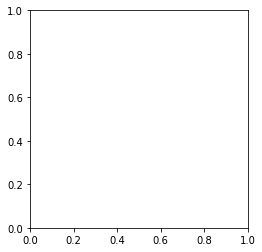

In [ ]:
#run the model for the test set and keep track of the accuracy.
from tqdm import tqdm

predictions = []
total = 0
test_X_embedding = encode_embedding([test_X])
for i in tqdm(range(len(test_X_embedding))):
  image = test_X_embedding[i]
  dist, product_i = street_to_shop(image, shop_embeddings,test_Y)
  total += 1
  correct += (1 if i == product_i else 0)
  if i == product_i:
    correct_i = i

print('accuracy:', correct / total)
print(correct_i)


2
580


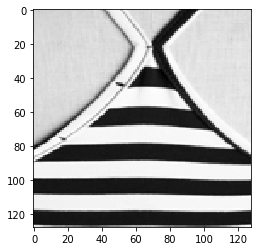

In [ ]:
# Show the correct match.
print(correct)
print(correct_i)
plt.imshow(test_X[correct_i].reshape(128,128), cmap='gray', interpolation='none')
plt.imshow(test_Y[correct_i].reshape(128,128), cmap='gray', interpolation='none')

Trial 2: Try pre-trained VGG16 Model


In [ ]:
#try pre-trained VGG embeddings 

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input
import numpy as np

pre_trained_model = VGG16(weights='imagenet')
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
baseModel.summary()

#encode_embedding = Model(inputs= baseModel.input, outputs= baseModel.layers[-2].output)
embedding_Y = baseModel([test_Y])
print(embedding_Y.shape)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
from tqdm import tqdm

#find embeddings with the pre-trained VGG model
predictions = []
correct = 0
total = 0
test_X_embedding = baseModel([test_X])

#calculate the accuracy. 
for i in tqdm(range(len(test_X_embedding))):
  image = test_X_embedding[i]
  dist, product_i = street_to_shop(image, embedding_Y, test_Y)
  total += 1
  correct += (1 if i == product_i else 0)

print('accuracy:', correct / total)




  0%|          | 0/66 [00:00<?, ?it/s]

  2%|▏         | 1/66 [00:00<00:11,  5.64it/s]

  8%|▊         | 5/66 [00:00<00:08,  7.57it/s]

 14%|█▎        | 9/66 [00:00<00:05,  9.95it/s]

 20%|█▉        | 13/66 [00:00<00:04, 12.82it/s]

 26%|██▌       | 17/66 [00:00<00:03, 16.06it/s]

 32%|███▏      | 21/66 [00:00<00:02, 19.52it/s]

 38%|███▊      | 25/66 [00:00<00:01, 22.90it/s]

 44%|████▍     | 29/66 [00:00<00:01, 26.18it/s]

 50%|█████     | 33/66 [00:01<00:01, 29.16it/s]

 56%|█████▌    | 37/66 [00:01<00:00, 30.79it/s]

 62%|██████▏   | 41/66 [00:01<00:00, 31.37it/s]

 68%|██████▊   | 45/66 [00:01<00:00, 33.12it/s]

 74%|███████▍  | 49/66 [00:01<00:00, 34.35it/s]

 80%|████████  | 53/66 [00:01<00:00, 35.78it/s]

 86%|████████▋ | 57/66 [00:01<00:00, 36.31it/s]

 92%|█████████▏| 61/66 [00:01<00:00, 35.71it/s]

100%|██████████| 66/66 [00:01<00:00, 34.34it/s]

accuracy: 0.015151515151515152
